In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
df=pd.read_csv("users.csv")
print(df.columns)
X,Y= df.iloc[:, 0:-1],df["ismalicious"]
enc = preprocessing.OrdinalEncoder()
X=enc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,
test_size=0.30)
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
Y_pred_class=LR_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))
Y_pred_prob=LR_model.predict_proba(X_test)
print((Y_pred_class==Y_test).sum()/Y_test.shape[0])
print(LR_model.score(X_test,Y_test))
print(metrics.accuracy_score(Y_test,Y_pred_class))
print(metrics.confusion_matrix(Y_test,Y_pred_class))
print(Y_pred_prob[0],Y_pred_class[0])

Index(['username', 'email', 'password', 'login_attempts', 'duration',
       'ismalicious'],
      dtype='object')
Accuracy: 100.00%
1.0
1.0
1.0
[[10  0]
 [ 0 26]]
[0.99154943 0.00845057] 0


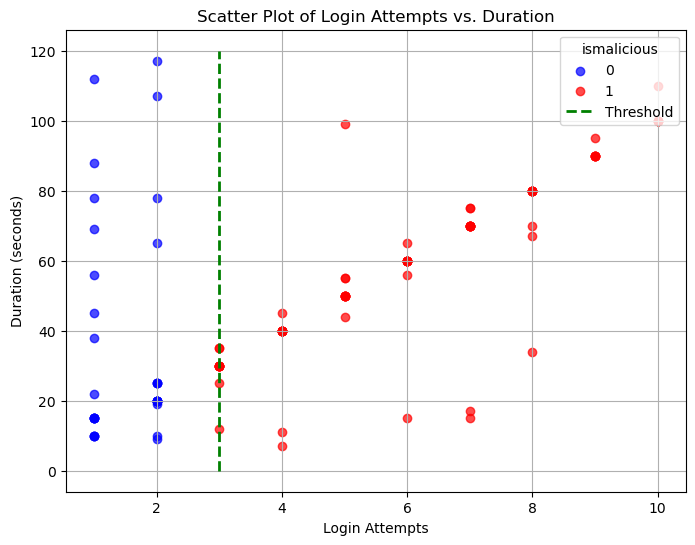

In [3]:
# Create scatter plot
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}
for label, color in colors.items():
    subset = df[df['ismalicious'] == label]
    plt.scatter(subset['login_attempts'], subset['duration'], color=color, label=label, alpha=0.7)

# Set threshold
threshold = 3

# Draw threshold line
plt.plot([threshold, threshold], [0, 120], color='green', linestyle='--', linewidth=2, label='Threshold')

# Set x and y-axis labels
plt.xlabel('Login Attempts')
plt.ylabel('Duration (seconds)')

# Add title
plt.title('Scatter Plot of Login Attempts vs. Duration')

# Add legend
plt.legend(title='ismalicious', loc='upper right')

# Display the plot
plt.grid(True)
plt.show()